In [1]:
import pandas as pd
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
# df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
"""
https://www.youtube.com/watch?v=FgakZw6K1QQ
https://www.youtube.com/watch?v=kw9R0nD69OU
https://www.youtube.com/watch?v=T-B8muDvzu0
https://www.youtube.com/watch?v=fKivxsVlycs
"""

'\nhttps://www.youtube.com/watch?v=FgakZw6K1QQ\nhttps://www.youtube.com/watch?v=kw9R0nD69OU\nhttps://www.youtube.com/watch?v=T-B8muDvzu0\nhttps://www.youtube.com/watch?v=fKivxsVlycs\n'

In [3]:
# Function to read csv file
def read_file(filename):
    line_count = 0
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        line1 = line.rstrip()
        line2 = line1.replace("Iris-setosa","0")
        line3 = line2.replace("Iris-versicolor","1")
        line4 = line3.replace("Iris-virginica","2")
        line_split=line4.split(",")
        data_array.append(line_split)
    return data_array

In [4]:
# URL Iris dataset from (UCI Machine Learning Repository)
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Read Iris csv file
iris_data = read_file("iris_dataset.csv")

In [5]:
import numpy as np
# Convert Iris data to numpy array
dataset = np.array(iris_data)
X2 = dataset[:,0:4]
y2 = dataset[:,4]

In [6]:
# Change string values to float numbers
X = X2.astype(np.float)
# Change target values to integers
# y = y2.astype(np.int)

In [7]:
X_header=["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width"]
df = pd.DataFrame(X,columns=X_header) # Get all X data
df["Species"] = y2 # Add species column

In [8]:
print(df.head())
print(df.tail())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2


In [9]:
import numpy as np
covariant_matrix = np.cov(X.T)
print(covariant_matrix)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [10]:
eigen_values,eigen_vectors = np.linalg.eig(covariant_matrix)

In [11]:
print(eigen_vectors)

[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [12]:
print(eigen_values)

[4.22484077 0.24224357 0.07852391 0.02368303]


4
[0.9246162071742686, 0.053015567850534955, 0.017185139525006814, 0.005183085450189793]


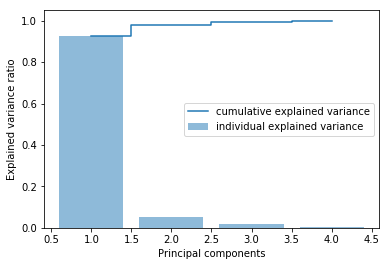

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values,reverse=True)]
print(len(var_exp))
print(var_exp)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,5),var_exp,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(1,5),cum_var_exp,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['principal component 1', 'principal component 2'])

In [15]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557]


In [16]:
print(pca.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [17]:
# PC1 = (0.36*SL)-(0.08*SW)+(0.85*PL)+(0.35*PW)
# PC2 = (0.65*SL)+(0.72*SW)-(0.17*PL)-(0.07*PW)
print(principalDf.head())
print(principalDf.tail())

   principal component 1  principal component 2
0              -2.684207               0.326607
1              -2.715391              -0.169557
2              -2.889820              -0.137346
3              -2.746437              -0.311124
4              -2.728593               0.333925
     principal component 1  principal component 2
145               1.944017               0.187415
146               1.525664              -0.375021
147               1.764046               0.078519
148               1.901629               0.115877
149               1.389666              -0.282887


In [18]:
finalDf = pd.concat([principalDf, df[['Species']]], axis = 1)

In [19]:
print(finalDf.head())
print(finalDf.tail())

   principal component 1  principal component 2 Species
0              -2.684207               0.326607       0
1              -2.715391              -0.169557       0
2              -2.889820              -0.137346       0
3              -2.746437              -0.311124       0
4              -2.728593               0.333925       0
     principal component 1  principal component 2 Species
145               1.944017               0.187415       2
146               1.525664              -0.375021       2
147               1.764046               0.078519       2
148               1.901629               0.115877       2
149               1.389666              -0.282887       2


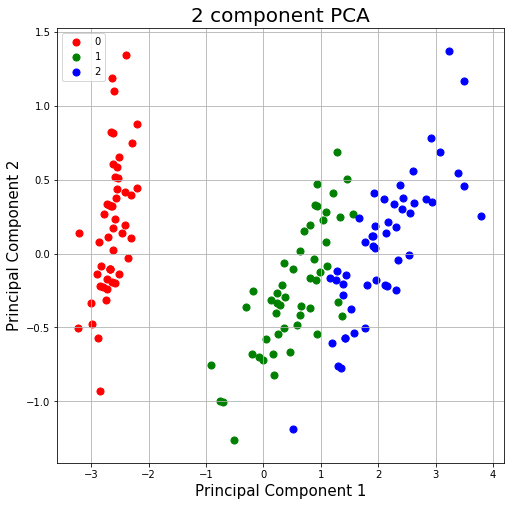

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1', '2']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
# PCA with 2 Principal Components = 97.5% of data variance

In [22]:
X_pca2 = finalDf.loc[:,'principal component 1':'principal component 2']
y_pca2 = finalDf['Species']

In [23]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_pca2,y_pca2)
print(model)
# make predictions
expected = y_pca2
predicted = model.predict(X_pca2)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [24]:
# save the model to disk
import pickle
filename = 'iris_pca.pkl'
pickle.dump(pca, open(filename, 'wb'))